In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans

data=pd.read_excel(r"C:\Dersler\Statistics for Big Data Prog and data analysis\data analysis\ClusterData.xls")

In [2]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RD,23.0,1.333478,0.890677,0.310,0.610,1.060,1.9050,3.600
TechIndex,23.0,4.697826,0.521971,3.820,4.390,4.670,4.9000,5.920
EduIndex,23.0,0.954783,0.037340,0.828,0.934,0.965,0.9795,0.993


In [3]:
data.head()

,Countries,RD,TechIndex,EduIndex
0,Austria,1.94,4.85,0.993
1,Bulgaria,0.59,3.82,0.930
2,Cyprus,0.31,4.36,0.910
3,Czech Re,1.20,4.88,0.938
4,Denmark,2.20,5.34,0.993


In [4]:
data.index=data.iloc[:,0]              
data=data.iloc[:,1:4]


In [5]:
data

,RD,TechIndex,EduIndex
Countries,,,
Austria,1.94,4.85,0.993
Bulgaria,0.59,3.82,0.930
Cyprus,0.31,4.36,0.910
Czech Re,1.20,4.88,0.938
Denmark,2.20,5.34,0.993
Finland,2.99,5.92,0.993
France,2.20,4.65,0.978
Germany,2.37,5.08,0.954
Greece,0.54,4.42,0.981


In [6]:
kmeans = KMeans(n_clusters = 5)        # k-means clustering
kmeans

KMeans(n_clusters=5)

In [7]:
k_fit = kmeans.fit(data)
k_fit.labels_
clusters = k_fit.labels_
pd.DataFrame({"countries" : data.index, "clusters": clusters})


,countries,clusters
0,Austria,0
1,Bulgaria,1
2,Cyprus,1
3,Czech Re,3
4,Denmark,0
5,Finland,2
6,France,0
7,Germany,0
8,Greece,1
9,Hungary,3


In [8]:
!pip install yellowbrick                              

You should consider upgrading via the 'c:\users\a\anaconda3\python.exe -m pip install --upgrade pip' command.


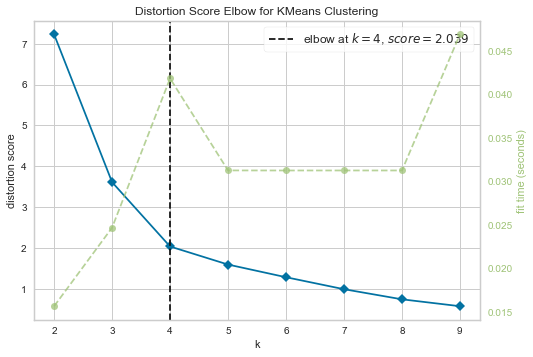

In [9]:
from yellowbrick.cluster import KElbowVisualizer                                             
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(data) 
visualizer.poof()                       # Elbow method minimizes within-cluster Sum of Square

Graph above!!
The elbow method for K selection visualizes multiple clustering models with different values for K. Model selection is based on whether or not there is an “elbow” in the curve; e.g. if the curve looks like an arm, if there is a clear change in angle from one part of the curve to another.
Distortion, which computes the sum of squared distances from each point to its assigned center

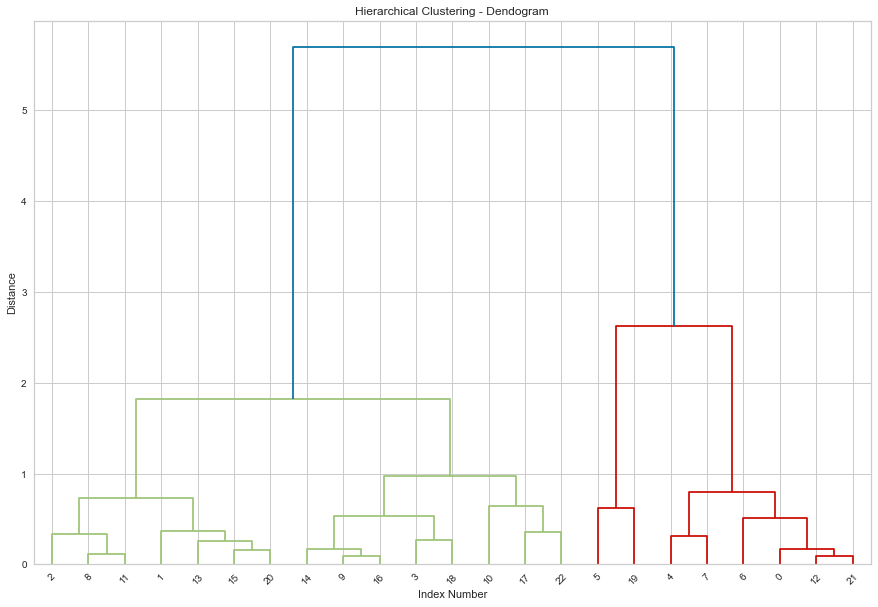

In [10]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(data, "complete")
hc_average = linkage(data, "average")
hc_single = linkage(data, "single")
hc_ward=linkage(data,"ward")

from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_ward,                                                                              
leaf_font_size=10);

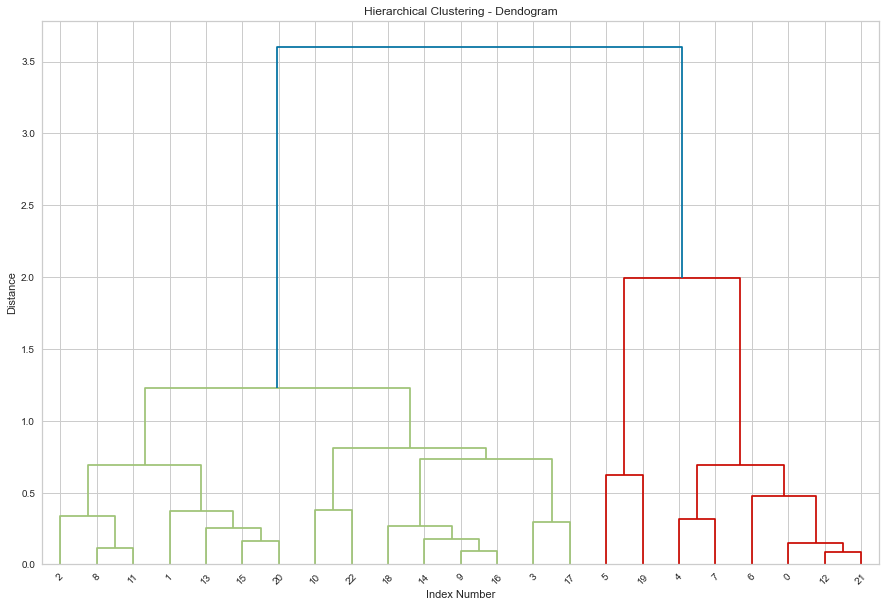

In [11]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_complete,                                                                              
leaf_font_size=10);

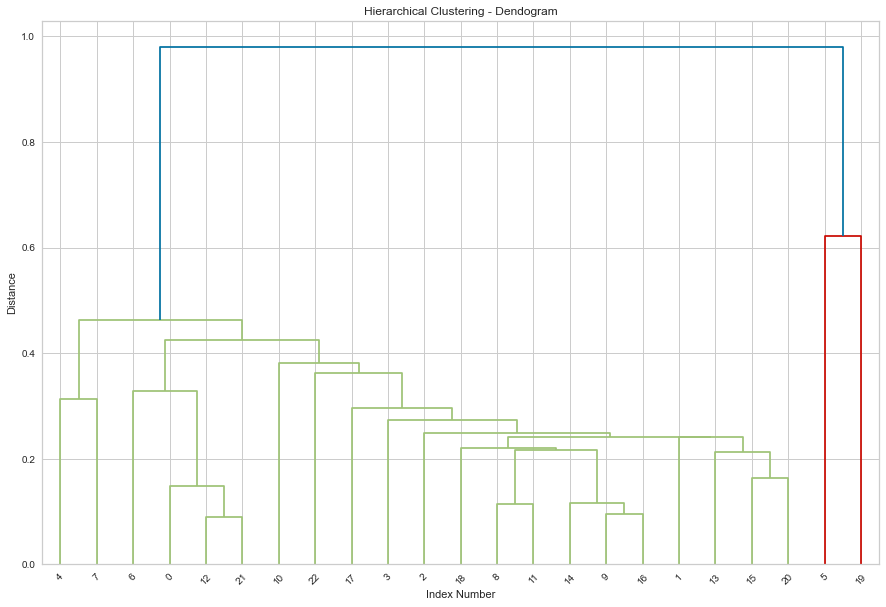

In [12]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_single,                                                                              
leaf_font_size=10);

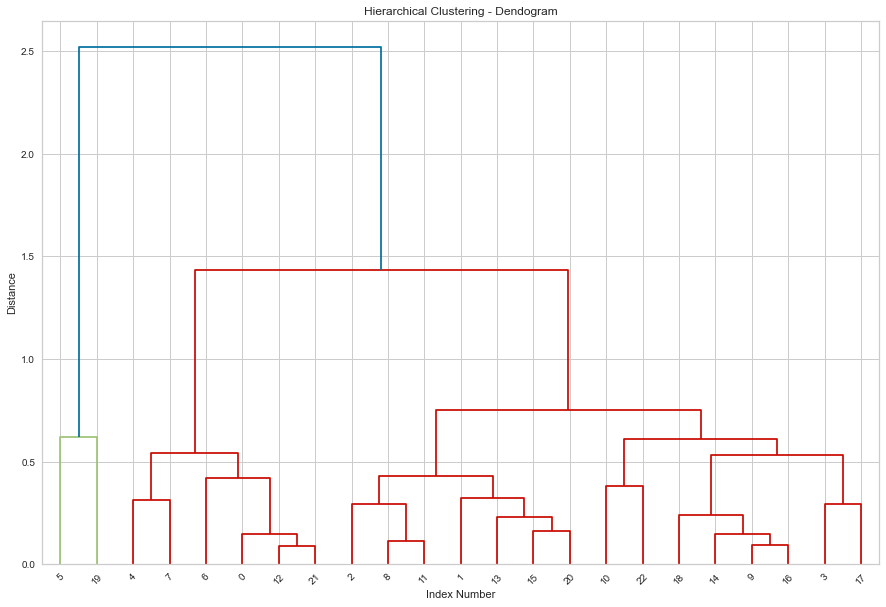

In [13]:
plt.figure(figsize=(15, 10))
plt.title('Hierarchical Clustering - Dendogram')
plt.xlabel('Index Number')
plt.ylabel('Distance')
dendrogram(
            hc_average,                                                                              
leaf_font_size=10);